# Semiconductor manufacturing process dataset

## Project Description
Source: https://www.kaggle.com/saurabhbagchi/fmst-semiconductor-manufacturing-project

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning, and reduce per-unit production costs. These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

Dataset: SemiconductorManufacturingProcessDataset.csv (on Canvas)

This project is divided into three parts. 

- Part I) the data preprocessing (completed)
- Part II) A model that can predict the status of a part（Pass/Fail）based on the available data with 2 different methods：1) Logistic Regression, 2) ANN
- Part III) Apply PCA (Principal Component Analyses) for feature selection and then apply ANN to predict the Pass/Fail.

The object of this Assignment 3 exercise is to repeat the same steps we did for Supplier Data:
- Cleaning & Scaling Data
- Encode Categorical Data
- Split the Data  to Training & Test Sets

Prepared by: Muyang Li </br>
Student number: 29816741 </br>
Date:2022-10-15</br>

## Importing the Libraries

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Importing the Dataset

In [136]:
dataset = pd.read_csv('SemiconductorManufacturingProcessDataset.csv')

## Showing the Dataset in a Table

In [137]:
pd.DataFrame(dataset)
#dataset

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


## A Quick Review of the Data

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


## Seperate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [139]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

## Showing the Input Data in a Table format

In [140]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


## A Quick Check of the Output Data

In [141]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


## Taking care of missing data

In [142]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [143]:
# A quick check
print(X)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


## Encoding Categorical Data

### Encoding the Independent Variable

In [144]:
# we don't have any categorical data

### Encoding the Dependent Variable

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [146]:
# a qucik check
print(y)

[1 1 0 ... 1 1 1]


## Feature Scaling

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset into the Training set and Test set

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [149]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [150]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


In [151]:
print(y_train)

[0 1 1 ... 1 1 1]


In [152]:
print(y_test)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [153]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [154]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


# Logistic Regression

## Logistic Regression Classifier

In [155]:
from sklearn.linear_model import LogisticRegression
LogitReg = LogisticRegression(max_iter=1000)
LogitReg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [156]:
y_pred=LogitReg.predict(X_test)

## Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[  4  18]
 [ 17 275]]
Your Model Accuracy is= 88.85350318471338 %


In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.18      0.19        22
           1       0.94      0.94      0.94       292

    accuracy                           0.89       314
   macro avg       0.56      0.56      0.56       314
weighted avg       0.89      0.89      0.89       314



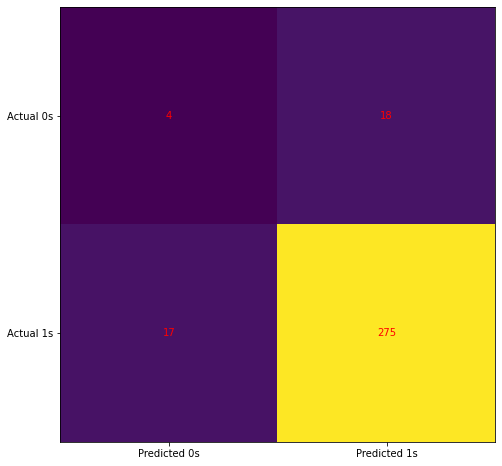

In [159]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Checking the Probability of Failure

In [160]:
X_avg = X.mean(axis=0)
X_new = np.reshape(X_avg,(1, 437))
Probability=LogitReg.predict_proba(X_new)

print("Chance of failure of this part is ", 100*Probability[0,1], "%" )

Chance of failure of this part is  99.91760381106369 %


## Fail (1) & Not Fail (0)

In [161]:
LogitReg.predict(X_new)

array([1])

0 means that the part is very unlikely to fail based on the model prediction; 1 means that the part will fail based on the model prediction.

## K-fold cross-validation 

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
#
# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.92857143 0.92857143 0.93650794 0.936      0.936      0.936
 0.936      0.936      0.936      0.936     ]
Cross Validation accuracy: 0.935 +/- 0.003


# Discussion

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.Based on the confusion matrix, the Model Accuracy is= 88.85350318471338 %.</br> 

This level of accuracy is decent to use in the manufacturing setting. 35 mistkaes have made for 314 testing data.</br>


In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.18      0.19        22
           1       0.94      0.94      0.94       292

    accuracy                           0.89       314
   macro avg       0.56      0.56      0.56       314
weighted avg       0.89      0.89      0.89       314



To test the accuracy, the K-fold cross-validation with k=10 is used, and the cross validation accuracy is 0.935 +/- 0.003. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It tells how accurately a predictive model will perform in practice.